# Data Preprocessing
## Library and dataset loading


In [1]:
source("https://raw.githubusercontent.com/eogasawara/mylibrary/master/myPreprocessing.R")
data(iris)
table(iris$Species)

Loading required package: caret
Warning message:
"package 'caret' was built under R version 3.5.1"Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.5.1"Loading required package: MASS
Loading required package: DMwR
Warning message:
"package 'DMwR' was built under R version 3.5.1"Loading required package: grid
Loading required package: dplyr
Warning message:
"package 'dplyr' was built under R version 3.5.1"
Attaching package: 'dplyr'

The following object is masked from 'package:MASS':

    select

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




    setosa versicolor  virginica 
        50         50         50 

## Sampling
Comparing random sampling with stratified sampling.
Sampling using kfolds technique. 

In [2]:
mysample <- sample.random(iris)
table(mysample$sample$Species)

mysample <- sample.stratified(iris, "Species")
table(mysample$sample$Species)


    setosa versicolor  virginica 
        40         37         43 


    setosa versicolor  virginica 
        40         40         40 

random k-fold sampling

In [3]:
myfolds <- sample.random_kfold(iris, k=4)
for (i in (1:length(myfolds)))
  print(table(myfolds[[i]]$Species))


    setosa versicolor  virginica 
         8         15         14 

    setosa versicolor  virginica 
        18         11          8 

    setosa versicolor  virginica 
        13         16          9 

    setosa versicolor  virginica 
        11          8         19 


stratified k-fold sampling

In [4]:
myfolds <- sample.stratified_kfold(iris, "Species", k=4)
for (i in (1:length(myfolds)))
  print(table(myfolds[[i]]$Species))


    setosa versicolor  virginica 
        13         13         13 

    setosa versicolor  virginica 
        13         13         13 

    setosa versicolor  virginica 
        12         12         12 

    setosa versicolor  virginica 
        12         12         12 


## Outlier analysis


In [5]:
out <- outliers.boxplot(iris)
myiris <- iris[!out,]
head(iris[out,])

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
16,5.7,4.4,1.5,0.4,setosa
33,5.2,4.1,1.5,0.1,setosa
34,5.5,4.2,1.4,0.2,setosa
61,5.0,2.0,3.5,1.0,versicolor


## min-max normalization

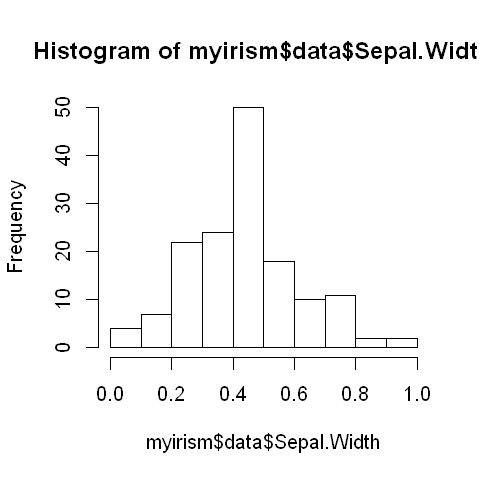

In [6]:
myirism <- normalize.minmax(iris)
options(repr.plot.width=4, repr.plot.height=4)
hist(myirism$data$Sepal.Width)

## zscore normalization
Ajustado para média 0.5 e desvio padrão de 0.185

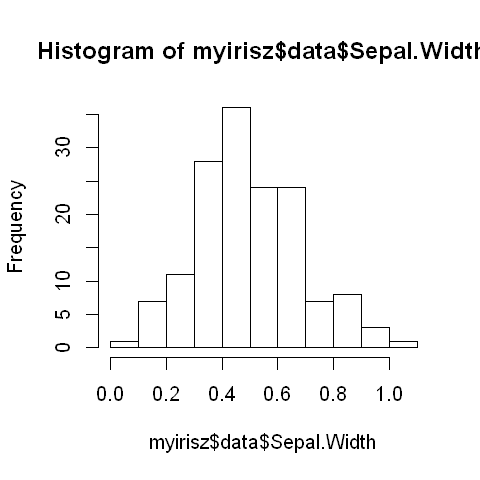

In [7]:
myirisz <- normalize.zscore(iris, nmean = 0.5,nsd = 0.5/2.698)
options(repr.plot.width=4, repr.plot.height=4)
hist(myirisz$data$Sepal.Width)

## PCA

PC1,PC2
2.640270,-5.204041
2.670730,-4.666910
2.454606,-4.773636
2.545517,-4.648463
2.561228,-5.258629
2.975946,-5.707321


,PC1,PC2
Sepal.Length,0.5210659,-0.37741762
Sepal.Width,-0.2693474,-0.92329566
Petal.Length,0.5804131,-0.02449161
Petal.Width,0.5648565,-0.06694199


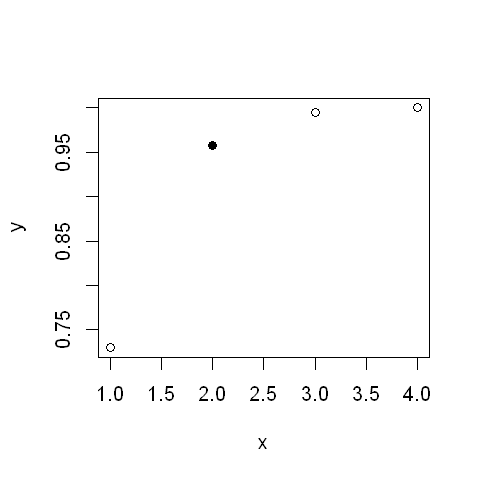

In [8]:
options(repr.plot.width=4, repr.plot.height=4)
mypca <- dt.pca(iris, "Species")
head(mypca$pca)
head(mypca$pca.transf)

## Binning

  0%  50% 100% 
 4.3  5.8  7.9 
[1] 4.3 6.1 7.9
[1] 4.300000 5.889375 7.900000
       0% 16.66667% 33.33333%       50% 66.66667% 83.33333%      100% 
      4.3       5.0       5.4       5.8       6.3       6.7       7.9 


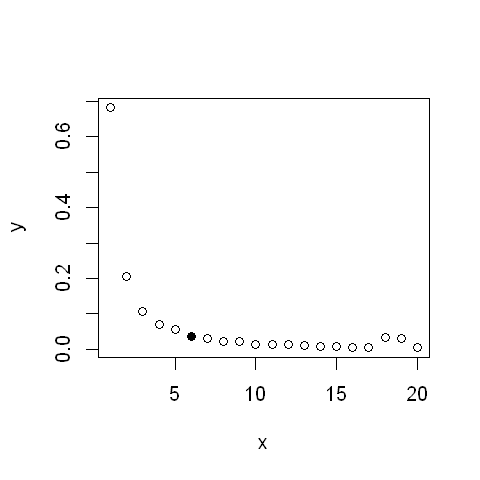

[1] 4.3 4.9 5.5 6.1 6.7 7.3 7.9


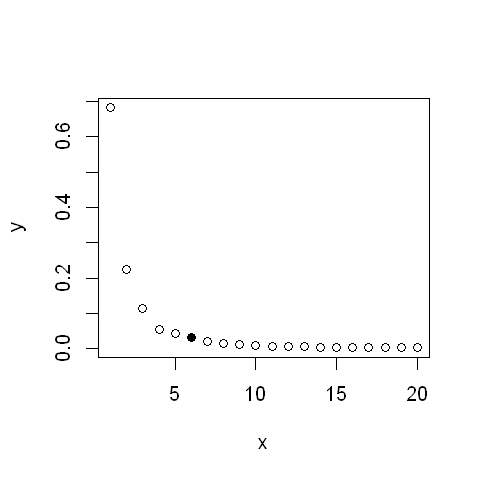

[1] 4.300000 5.148882 5.606944 5.993924 6.470313 7.117045 7.900000


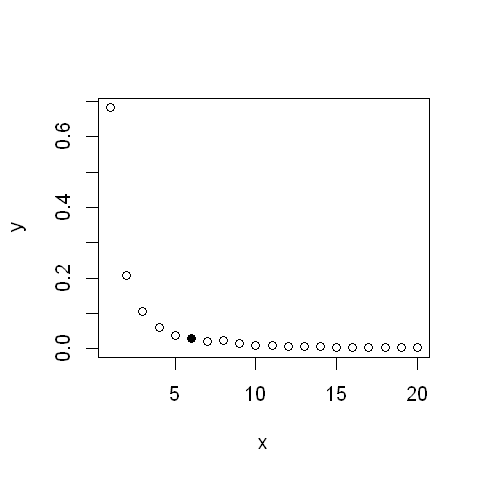

In [9]:
Sepal.Bin.f <- binning.freq(iris$Sepal.Length, n=2)
print(Sepal.Bin.f$interval)
Sepal.Bin.i <- binning.interval(iris$Sepal.Length, n=2)
print(Sepal.Bin.i$interval)
Sepal.Bin.c <- binning.cluster(iris$Sepal.Length, n=2)
print(Sepal.Bin.c$interval)

options(repr.plot.width=4, repr.plot.height=4)

Sepal.Bin.fo <- binning.opt(iris$Sepal.Length, binning=binning.freq)
print(Sepal.Bin.fo$interval)
Sepal.Bin.io <- binning.opt(iris$Sepal.Length, binning=binning.interval)
print(Sepal.Bin.io$interval)
Sepal.Bin.co <- binning.opt(iris$Sepal.Length, binning=binning.cluster)
print(Sepal.Bin.co$interval)

## Balancing datasets
O dataset myiris foi artificialmente desbalanceado. 
Duas técnicas para correção foram aplicadas: oversampling e subsampling.

In [10]:
#forçando um desbalançeamento
myiris <- iris[c(1:20,51:100, 110:120),]
print(table(myiris$Species))
myiris.bo <- balance.oversampling(myiris, "Species")
print(table(myiris.bo$Species))
myiris.bs <- balance.subsampling(myiris, "Species")
print(table(myiris.bs$Species))


    setosa versicolor  virginica 
        20         50         11 

versicolor  virginica     setosa 
        50         50         50 

    setosa versicolor  virginica 
        11         11         11 


## Categorical mapping

In [11]:
head(iris)
mycm <- dt.categ_mapping(iris, "Species")
head(mycm)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Speciessetosa,Speciesversicolor,Speciesvirginica
5.1,3.5,1.4,0.2,1,0,0
4.9,3.0,1.4,0.2,1,0,0
4.7,3.2,1.3,0.2,1,0,0
4.6,3.1,1.5,0.2,1,0,0
5.0,3.6,1.4,0.2,1,0,0
5.4,3.9,1.7,0.4,1,0,0
